## Importa bibliotecas

In [34]:
import pandas as pd
import seaborn as sns
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Le arquivo

In [2]:
dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv")
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
colunas = {
    "unfinished": "nao_finalizado",
    "expected_hours": "horas_esperadas",
    "price": "preco"
}

dados = dados.rename(columns=colunas)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
troca = {
    0: 1,
    1: 0
}

dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [5]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


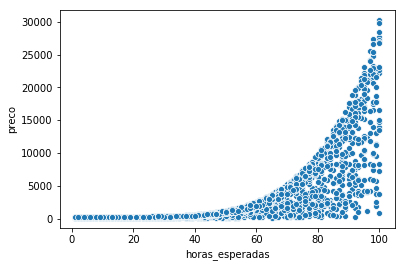

In [6]:
sns.scatterplot(x='horas_esperadas', y='preco', data=dados)

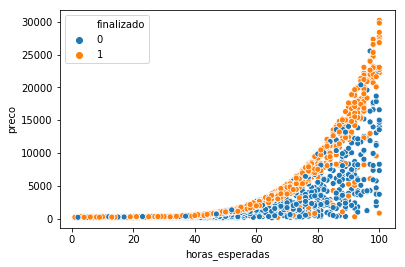

In [7]:
sns.scatterplot(x='horas_esperadas',
                y='preco', data=dados,
               hue='finalizado')

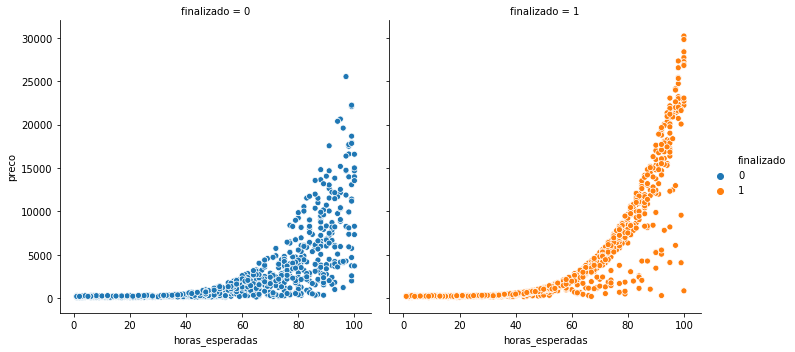

In [8]:
sns.relplot(x='horas_esperadas',
            y='preco', data=dados,
            col='finalizado',
            hue='finalizado')

In [9]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']


In [19]:
## Cria treino/teste

SEED = 20
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state = SEED, stratify = y)

print(teste_x.shape)

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
accuracy_score(teste_y, previsoes)

(540, 2)


/Users/luanandrade/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5425925925925926

In [47]:
previsoes_de_base = np.ones(540)
accuracy_score(teste_y, previsoes_de_base)

## acuracia do algoritmo de baseline foi de 52,59%



0.5259259259259259

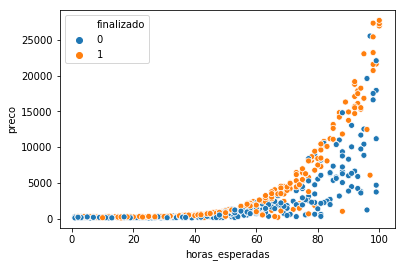

In [21]:
sns.scatterplot(x="horas_esperadas", 
                y="preco", data=teste_x,
                hue=teste_y) 

In [22]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

In [23]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [24]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [25]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

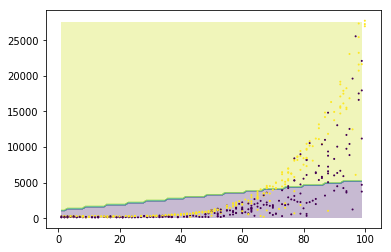

In [26]:
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, 
            teste_x.preco,
            s=1, c=teste_y)
## decision boundary

/Users/luanandrade/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


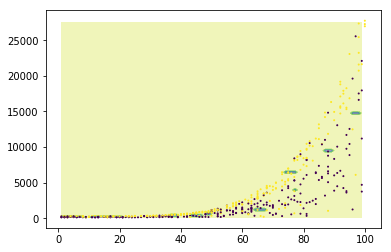

In [48]:
## USA SVC ao invés de Linear SVC

SEED = 20
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state = SEED, stratify = y)

modelo = SVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
accuracy_score(teste_y, previsoes)


x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

# Plota
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, 
            teste_x.preco,
            s=1, c=teste_y)

/Users/luanandrade/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/luanandrade/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
/Users/luanandrade/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


Acuracia: 70.37037037037037%


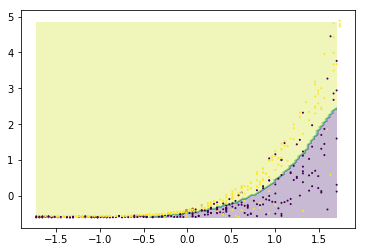

In [52]:
SEED = 20
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state = SEED, stratify = y)

# escala valores
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
print("Acuracia: {}%".format(accuracy_score(teste_y, previsoes) * 100))

data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(data_x, 
            data_y,
            s=1, c=teste_y)